# Assignment 1 – Data analysis for Astro data
## Anna Rooney, 19333456, 3rd year Physics 2024
### [My github](https://github.com/arir2001/mitchison)
### PYU33C01, Computer Simulation I: Computational Methods (Mitchison)


### Tasks

**(a) How many planets were discovered each year?** 
- Plot the number of planets discovered per year versus time.
  - X-axis: Year
  - Y-axis: Number of planets discovered

[Go to (a) Results](#sectiona)

**(b) How does a planet's mass correlate with the mass of its star?**
- Create a scatter plot on a log-log scale showing each planet's mass versus the mass of its star.
- Write a brief comment on the meaning of the plot and print it to the screen using a `print()` statement.

[Go to (b) Results](#sectionb)

**(c) How many planets have been discovered at each facility?**
- For each facility:
  - Find the total number of planets discovered.
  - Determine the year of the first planet discovery.
- Print a list of the top 10 facilities, ordered by the year of the first discovery.
  - The list should include:
    - Facility name
    - Total number of planets discovered
    - Year of first discovery
- Print the name of the facility that has discovered the most planets overall.

[Go to (c) Results](#sectionc)

## Basic set up of data, copied from lab 1:

In [1]:
## - copied from lab 1 : 

# Load packages
import numpy as np
import matplotlib.pyplot as plt
import os
# Increase the font size to 16
plt.rcParams.update({'font.size': 16})

# This reads each line of the data file and stores it as an array of strings
data = np.loadtxt('planets_2024.csv', delimiter=',', dtype=str)

""" Some of the fields are missing for certain stars, which could cause difficulty.  
More advanced database packages, like pandas, can account for this.   
For now, we'll use a quick fix and replace all the empty fields with '0'."""
data[np.nonzero(data=='')] = '0'

labels = data[0]
print(labels)

['pl_name' 'hostname' 'disc_year' 'disc_facility' 'pl_orbsmax' 'pl_bmassj'
 'st_mass' 'sy_dist']


/tmp/ipykernel_22670/594595145.py:11: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt('planets_2024.csv', delimiter=',', dtype=str)


## Question a: 

**(a) How many planets were discovered each year?** 
- Plot the number of planets discovered per year versus time.
  - X-axis: Year
  - Y-axis: Number of planets discovered

## Method: 
- Create two lists of all the years , even repeats and all the fascilities, even repeats. Then a list of unique years.
- Create a dictionary
- Make a for loop: 
  - Check each possible year against the unique year. If they match, the count +1 
  - At the end of the if loop where the count is added, the dictionary appends the count 
  - count is reset to 1 as the loop begins again with a new unique year
- Simply plot frequency determined from the loop, and the years associated with those from the dictionary. 


In [2]:
#plot number of planets discovered per year vs time 
#Find number of unique years , then iterate over and count how many times for each planet, similar to the stars' system sizes in lab 1

all_disc_year = data[1:,2]      #all the years , even repeats

all_fac_names = data[1:,3]      #all the fascilities, even repeats

unique_disc_year = np.unique(all_disc_year)     #unique years only 

year_dic = {}       #dictionary to keep things easy


#This for loop checks each possible year against the unique year. If they match, the count +1
#At the end of the if loop where the count is added, the dictionary appends the count and the facilities aassociated with those discoveries 
#Then The l list (which holds fascilities) is cleared and count is reset to 1 as the loop begins again with a new unique year
for i in range(len(unique_disc_year)):
    count = 0
    for x in range(len(all_disc_year)):
        if all_disc_year[x] == unique_disc_year[i]:
            count = count + 1
        year_dic[unique_disc_year[i]] = count 
    #un comment out below print statement if you need to see how quickly the for loop is running!
    #print('We have now finished the year', unique_disc_year[i], 'there are ', len(unique_disc_year) - i, ' years left to go')
    
print('Question -- how many planets were discovered in 2002?')

print(year_dic['2002'], "planets were discovered in 2002." )

Question -- how many planets were discovered in 2002?
29 planets were discovered in 2002.


<a id="sectiona"> Section a result, frequency of discoveries vs year </a>

Plot saved to: plots/Part A - planets discovered vs year


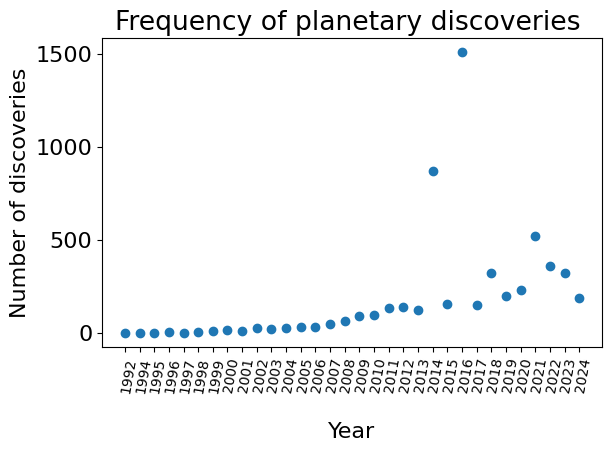

In [22]:
pathdir = 'plots'
if not os.path.exists(pathdir):
    os.makedirs(pathdir)

frequency = list(year_dic.values())
y = list(key for key in year_dic)      # while we could just use unique_disc_year, we can use the keys in case we decide to sort the dictionary later. 

plt.scatter(y, frequency)

plt.title("Frequency of planetary discoveries ")     
plt.xlabel("Year", labelpad=20)                      
plt.ylabel("Number of discoveries")  
plt.xticks(rotation=80, ha='right', rotation_mode='anchor', fontsize=10)

#SAVE the plot to the directory
save_path = os.path.join(pathdir, 'Part A - planets discovered vs year')
plt.savefig(save_path)  #save the figure as a .png file

print(f"Plot saved to: {save_path}")
plt.tight_layout() 

#show the plot
plt.show()

#clear figure so plots dont overlap.
plt.clf()



## Question b: 
**(b) How does a planet's mass correlate with the mass of its star?**
- Create a scatter plot on a log-log scale showing each planet's mass versus the mass of its star.
- Write a brief comment on the meaning of the plot and print it to the screen using a `print()` statement.

## Method: 
- Create lists of the  collumns for planetary masses and star masses
- making a direcctry to hold the pngs of the plot. 
- use ax.set_scale to change it to log-log scales
- use ax.scatter to make a scatter plot.
- approcpriate titles and labels. 
- Simply plot the planet masses vs the star masses. 

Plot saved to: plots/Part b - planet vs star : masses


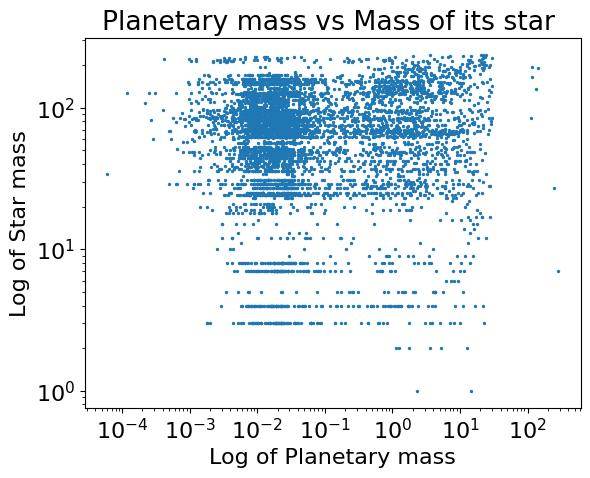

<Figure size 640x480 with 0 Axes>

In [4]:
#setting up lists of the collumns for planetary masses and star masses
planet_masses = data[1:,5].astype(float)

star_masses = data[1:,6]

#print(planet_masses[:6], star_masses[:6])

#Plotting
pathdir = 'plots'
if not os.path.exists(pathdir):
    os.makedirs(pathdir)

#source on how to set log log axes fr scatter plots: https://stackoverflow.com/questions/18773662/scatter-plot-logarithmic-scale
fig = plt.figure()
ax = plt.gca()

ax.scatter(planet_masses, star_masses, s=2)

plt.title("Planetary mass vs Mass of its star ")     
plt.xlabel("Log of Planetary mass")                      
plt.ylabel("Log of Star mass")  

ax.set_yscale('log')
ax.set_xscale('log')

#SAVE the plot to the directory
save_path = os.path.join(pathdir, 'Part b - planet vs star : masses')
plt.savefig(save_path)  #save the figure as a .png file

print(f"Plot saved to: {save_path}")

#show the plot
plt.show()

#clear figure so plots dont overlap.
plt.clf()

<a id="sectionb"> Section b result, star mass vs planet mass^ </a>


In [17]:
print('Just from the density, we can see there are more planets around stars of mass 10^1 and 10^2. ')
print('There are slightly more planetary masses are aroound 10^-4 and 10^-3.')
print('There is no strong linear trend.')


Just from the density, we can see there are more planets around stars of mass 10^1 and 10^2. 
There are slightly more planetary masses are aroound 10^-4 and 10^-3.
There is no strong linear trend.



## Question c: 

**(c) How many planets have been discovered at each facility?**
- For each facility:
  - Find the total number of planets discovered.
  - Determine the year of the first planet discovery.
- Print a list of the top 10 facilities, ordered by the year of the first discovery.
  - The list should include:
    - Facility name
    - Total number of planets discovered
    - Year of first discovery
- Print the name of the facility that has discovered the most planets overall.

## Method: 
- Create a list of all the facility names, and then the unique facility names.
- Define a dictionary
- In a loop iterating through i the length of the unique names, in another loop over all possible lines x,
  - cross check if the unique name i == facility name at indice x 
  - count the number of times the facility name appears ('count')
  - if so, append the disc year x in a list
  - then find the minimum year of all those years in that list
  - to the dictionary: 
    -  append the number of times the name appears as the number of planets found
    - and the minimum year as the year of first discovery

- Then sort the dictionary by the planets found
- Create lists of the keys and values that are now sorted according to the lowest to highest planets found. 
- Truncate the lists to the top 10. Use argsort to find the indices of these top 10 years.
- Print the most prolifice 10 facilities in the order of indices for the top 10 years. 
- Print the facility with the maximum number of planets found. 

In [6]:
#following the exact same formula as in part a
#these in fact could have been put into the same loop!! But for ease of the assignment, I have them in seperate loops here 
# However, it would be very easy to combine and would adhere to DRY concept.

all_fac_names = data[1:,3]      #all the fascilities, even repeats

unique_fac_names = np.unique(all_fac_names)

part_c_dic ={}

#for each unique facillity, count hw many time its mentioned == number of planets discovered
#append the year for that same indice for all instances of the unique facility
#find the min year in that list, add that to the dictionary. Dic(facility) = number oof planets found, first year oof discovery
#how

for i in range(len(unique_fac_names)):
    l = []
    count = 0
    for x in range(len(all_fac_names)):
        if all_fac_names[x] == unique_fac_names[i]:
            count = count + 1
            l.append(all_disc_year[x])      #append the year associated with the facility at indice x
        #print(l)
        first_year_of_discovery = min(l) if len(l) > 0 else None
        part_c_dic[str(unique_fac_names[i])] = [count, str(first_year_of_discovery)]
        
    #un comment out below print statement if you need to see how quickly the for loop is running!
    #print('We have now finished counting for the facility', unique_fac_names[i], 'there are ', len(unique_fac_names) - i, ' facilities left to go')


In [7]:
#printing the first 10 

#sorting the dictionary by largest num of planets found 
# item[1] refers to the tuple, item[1][0] refeers to the first item in that tuple, ie the number of planets found
#reverse = true sorts highest found first, lowest last. 
#source == https://www.datacamp.com/tutorial/sort-a-dictionary-by-value-python

sorted_by_year_dic = dict(sorted(part_c_dic.items(), key=lambda item: item[1][0], reverse=True))

years = list(value[1] for key, value in sorted_by_year_dic.items())[0:10]

planet_frequency = list(value[0] for key, value in sorted_by_year_dic.items())[0:10]

ordered_names = list(key for key in sorted_by_year_dic)[0:10]

# Print the sorted dictionary -- 
#print(years)
#print(planet_frequency)
#print(ordered_names)


<a id="sectionc"> Section c result, top ten facilities with the highest numbers of planets found, sorted by year of first discovery^ </a>

In [8]:
ind = np.argsort(years)
#print(ind)      # these indices sort the lists by year

print("Here are the 10 facilities with the highest numbers of planets found, sorted by year of first discovery.")
print()
for x in range(len(ind)):
    print(fr"The number of planets discovered at {ordered_names[ind[x]]} was {planet_frequency[ind[x]]}. The year of first discovery was {years[ind[x]]}.")
    print()

maximum = np.argsort(planet_frequency)
print(fr"The facility with the highest number of planets discovered was {ordered_names[maximum[-1]]} was {planet_frequency[maximum[-1]]}. The year of first discovery was {years[maximum[-1]]}.")


Here are the 10 facilities with the highest numbers of planets found, sorted by year of first discovery.

The number of planets discovered at Multiple Observatories was 311. The year of first discovery was 1996.

The number of planets discovered at W. M. Keck Observatory was 189. The year of first discovery was 1998.

The number of planets discovered at La Silla Observatory was 285. The year of first discovery was 1999.

The number of planets discovered at OGLE was 104. The year of first discovery was 2002.

The number of planets discovered at SuperWASP was 113. The year of first discovery was 2007.

The number of planets discovered at Kepler was 2773. The year of first discovery was 2009.

The number of planets discovered at HATSouth was 73. The year of first discovery was 2012.

The number of planets discovered at K2 was 548. The year of first discovery was 2014.

The number of planets discovered at KMTNet was 94. The year of first discovery was 2016.

The number of planets discovere